In [1]:
import numpy as np
import networkx as nx
import nb_general as nb
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
G = nx.complete_graph(5)

In [3]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [4]:
G.remove_edges_from([[1,2],[2,3],[0,1]])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


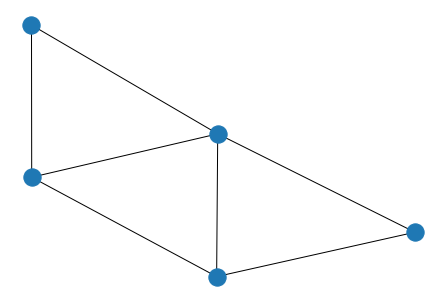

In [5]:
nx.draw(G)
plt.show()

In [6]:
S, T = nb.create_s_t(G)

In [7]:
T@T.T

array([[3., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 4.]])

In [8]:
C, B, tau = nb.to_edge_space(G,B=True,graph=False,ret_tau=True)

In [9]:
la.inv(D_hat-np.eye(D_hat.shape[0]))@la.eig(B)[1][:,0]/la.norm(la.inv(D_hat-np.eye(D_hat.shape[0]))@la.eig(B)[1][:,0])

NameError: name 'D_hat' is not defined

In [10]:
D_hat = np.diag(C.sum(axis=1))

In [11]:
P_hat = la.inv(D_hat-np.eye(D_hat.shape[0]))@B

In [17]:
C@(tau@C)@tau

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 4., 0., 4., 0., 4., 0., 0., 4., 0., 0., 0., 0.],
       [0., 3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 4., 0., 4., 0., 4., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 3., 0., 0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 4., 0., 4., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 3., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0.],
       [0., 0., 4., 0., 4., 0., 4., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 3., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [15]:
(C@tau-np.eye(C.shape[0]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

$$K=\begin{pmatrix}P&0\\0&P\end{pmatrix}\begin{pmatrix}S&P^{-1}(D-I)P\\-I&0\end{pmatrix}\begin{pmatrix}P^{-1}&0\\0&P^{-1}\end{pmatrix}$$

In [137]:
tau@C@tau@C

array([[3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.]])

In [14]:
D_hat = np.diag(C.sum(axis=1))

In [15]:
la.solve(D_hat - tau,S)

array([[0.2       , 0.        , 0.6       , 0.        , 0.        ],
       [0.125     , 0.        , 0.        , 0.375     , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.27272727],
       [0.        , 0.2       , 0.        , 0.4       , 0.        ],
       [0.        , 0.14285714, 0.        , 0.        , 0.28571429],
       [0.4       , 0.        , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.        , 0.28571429],
       [0.375     , 0.        , 0.        , 0.125     , 0.        ],
       [0.        , 0.6       , 0.        , 0.2       , 0.        ],
       [0.        , 0.        , 0.        , 0.09090909, 0.27272727],
       [0.36363636, 0.        , 0.        , 0.        , 0.09090909],
       [0.        , 0.57142857, 0.        , 0.        , 0.14285714],
       [0.        , 0.        , 0.57142857, 0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.36363636, 0.09090909]])

In [16]:
D_hat_inv = la.inv(D_hat-np.eye(D_hat.shape[0]))

In [17]:
(S.T@D_hat_inv).T

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ]])

In [18]:
np.allclose(D_hat_inv@S.T,S@D_hat_inv)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 14)

In [19]:
D_hat

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [20]:
S@T@tau@S@T

array([[0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.]])

In [21]:
S@T@tau@S@T

array([[0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.]])

In [22]:
R = np.ones_like(C)-np.eye(C.shape[1])

In [23]:
(tau@S@T)+S@T@tau

array([[2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 2., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 2., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 2., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 2., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 1., 1., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 2.]])

In [24]:
tau@S@T@tau@S@T

array([[3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.]])

In [25]:
D_hat

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [26]:
I = np.eye((S@T).shape[0])

In [27]:
A = nx.adjacency_matrix(G).todense()

In [28]:
A.sum(axis=1)

matrix([[3],
        [2],
        [2],
        [3],
        [4]], dtype=int64)

In [29]:
D

NameError: name 'D' is not defined

In [30]:
(tau@S@T+I)@(tau@S@T+I)-4*tau@S@T+I

array([[3., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 3., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 4., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 4., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 4.]])

In [31]:
D_hat@tau@S@T

array([[2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3.]])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


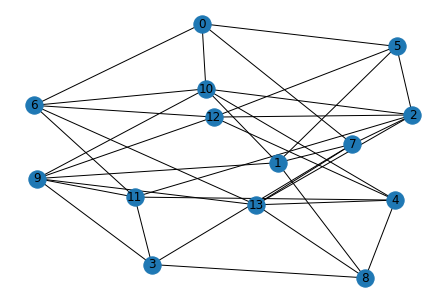

In [48]:
nx.draw(nx.Graph(C),with_labels=True)
plt.show()

In [68]:
C@tau@C

array([[0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0., 0.]])

In [69]:
G = nx.Graph([[1,2],[2,3]])

In [70]:
C, B, tau = nb.to_edge_space(G,graph=False,ret_tau=True, B=True)

In [71]:
C

array([[0., 1., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 1., 0.]])

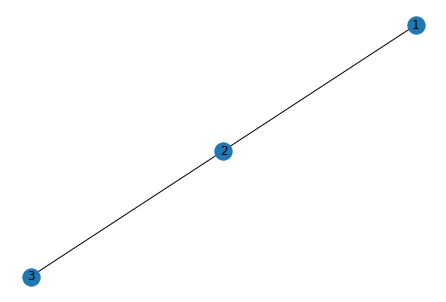

In [72]:
nx.draw(G,with_labels=True)
plt.show()

In [73]:
(tau@C@tau)@(tau@C@tau)

array([[1., 0., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.]])

In [74]:
C@tau@C

array([[0., 2., 2., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 2., 2., 0.]])

In [75]:
D_hat = np.diag(C.sum(axis=1))

In [76]:
D_hat

array([[2., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 2.]])

In [100]:
C@(tau@C-tau)

array([[-1.,  2.,  2., -1.],
       [ 1., -1.,  0.,  0.],
       [ 0.,  0., -1.,  1.],
       [-1.,  2.,  2., -1.]])

In [88]:
I = np.eye(C.shape[0])